In [1]:
### Setting env
import os, sys

folder = os.getcwd()
if(not(folder.endswith('tcc-machine-learning'))):
        os.chdir('..')
folder = os.getcwd()

### Core Packages
import pandas as pd
import numpy as np

### Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

### Financial packages
import yfinance as yf
import pandas_datareader.data as web

### Functions
from dags import config
from dags.utils import chose_path_to_work, collect_raw_data, formating_columns, plot_boxplots, save_image

### Others
import warnings

In [2]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 12], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

### Loading Data

In [4]:
ticker = 'petr4.sa'
df_ticker = pd.read_csv(f'data/raw/{ticker}.csv', encoding='utf8', delimiter=',')
df_ticker = formating_columns(df_ticker)

In [5]:
df_ticker.head()

,date,open,high,low,close,adj_close,volume
0,2001-01-01,5.72,5.72,5.72,5.72,2.85,0
1,2001-01-02,5.72,5.97,5.72,5.91,2.95,32521600
2,2001-01-03,5.89,6.21,5.82,6.21,3.10,60508800
3,2001-01-04,6.22,6.27,6.20,6.24,3.11,46118400
4,2001-01-05,6.25,6.39,6.16,6.25,3.12,41360000


### Describing Data

In [6]:
df_ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5268 non-null   datetime64[ns]
 1   open       5268 non-null   float64       
 2   high       5268 non-null   float64       
 3   low        5268 non-null   float64       
 4   close      5268 non-null   float64       
 5   adj_close  5268 non-null   float64       
 6   volume     5268 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 288.2 KB


In [7]:
print(f"{ticker}:\n{df_ticker.shape[0]} rows\n{df_ticker.shape[1]} columns")

petr4.sa:
5268 rows
7 columns


In [8]:
list_columns = (df_ticker.columns).tolist()
print(f'Columns: {list_columns}')

Columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']


**NOTES**

**Legenda das Colunas:**
- Date: Data do registro
- Open: Preço de abertura do dia
- High: Preço máximo atingido no dia
- Low:  Preço mínimo atingido no dia
- Close: Preço de fechamento do dia
- Adj Close: Preço de fechamento ajustado
- Volume: Volume de ações negociadas

###  Exploring Data

In [9]:
### Ticker Measures
df_ticker.describe()

,open,high,low,close,adj_close,volume
count,5268.00,5268.00,5268.00,5268.00,5268.00,5268.00
mean,19.11,19.39,18.80,19.08,11.88,46067599.62
std,9.26,9.40,9.10,9.22,6.04,70173257.88
min,4.20,4.27,4.12,4.20,2.18,0.00
25%,11.51,11.65,11.29,11.49,6.34,20488625.00
50%,19.35,19.60,19.00,19.27,11.87,31885450.00
75%,25.64,25.96,25.26,25.55,16.23,50766225.00
max,67.50,67.50,51.95,52.51,29.40,1336049152.00


In [10]:
### Checking for missing data
df_ticker.isna().any()

date         False
open         False
high         False
low          False
close        False
adj_close    False
volume       False
dtype: bool

In [11]:
### Checking for duplicated data
df_ticker.duplicated().any()

False

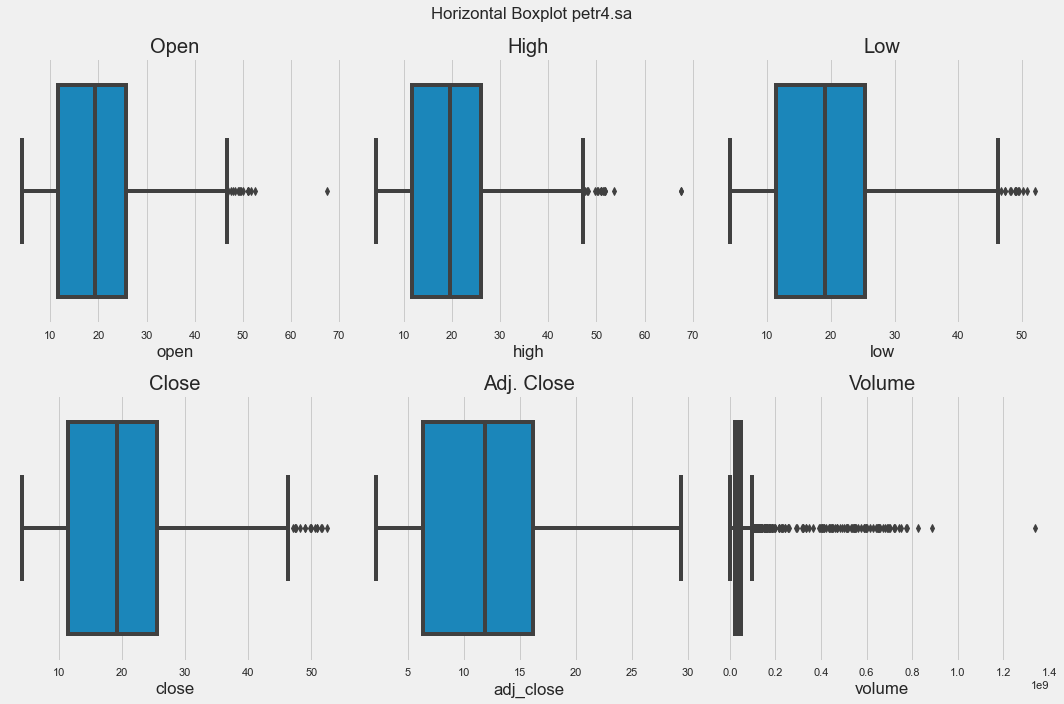

In [12]:
boxplots = plot_boxplots(df_ticker, ticker)

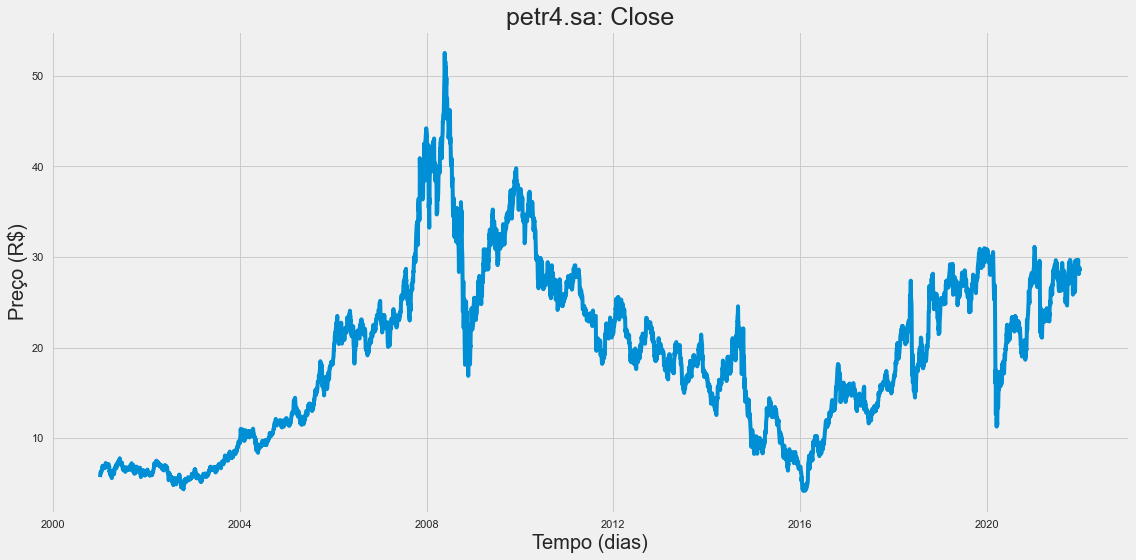

In [13]:
img_ticker_distr_line = sns.lineplot(data = df_ticker, x = 'date', y = 'close')
plt.title(f'{ticker}: Close', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

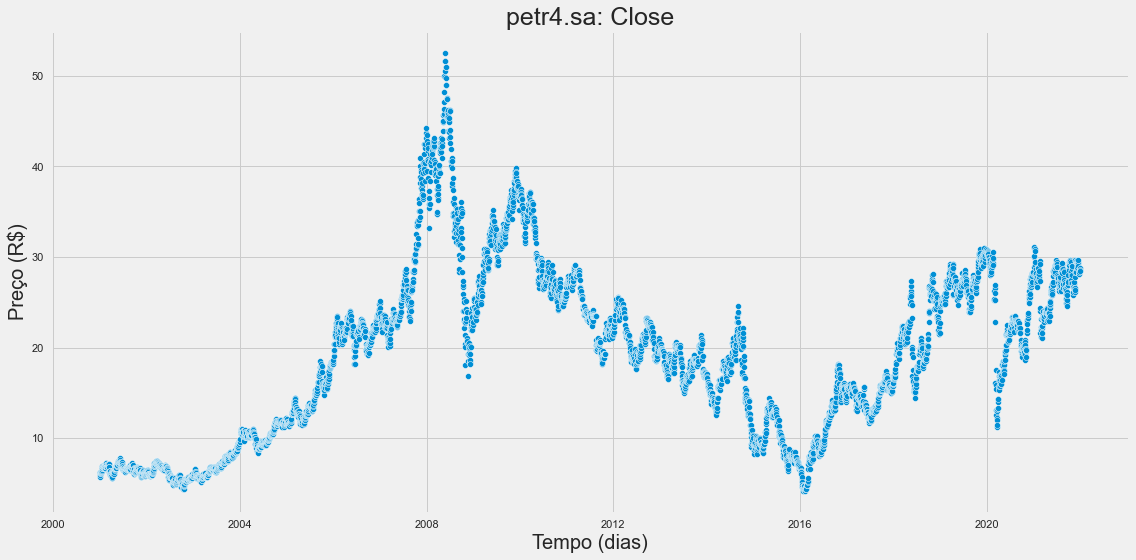

In [14]:
img_ticker_distr_scatter = sns.scatterplot(data = df_ticker, x = 'date', y = 'close')
plt.title(f'{ticker}: Close', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

In [15]:
### Saving Images

In [16]:
save_image(img=boxplots, name=f'img_{ticker}_bxplots')
save_image(img=img_ticker_distr_line, name=f'img_{ticker}_lineplot')
save_image(img=img_ticker_distr_scatter, name=f'img_{ticker}_scatterplot')

Image img_petr4.sa_bxplots saved.
Image img_petr4.sa_lineplot saved.
Image img_petr4.sa_scatterplot saved.
